

<h1 style='color:blue; text-align:center;'>Formula 1 Circuits – Data Analysis</h1>
<h3 style='color:gray; text-align:center;'>Dataset Preview</h3>


In [1]:
import pandas as pd

# --- Step 1: Load and Inspect the Data ---

In [2]:
df=pd.read_csv("circuits.csv")
df

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park
...,...,...,...,...,...,...,...,...,...
72,75,portimao,Autódromo Internacional do Algarve,Portimão,Portugal,37.22700,-8.62670,108,http://en.wikipedia.org/wiki/Algarve_Internati...
73,76,mugello,Autodromo Internazionale del Mugello,Mugello,Italy,43.99750,11.37190,255,http://en.wikipedia.org/wiki/Mugello_Circuit
74,77,jeddah,Jeddah Corniche Circuit,Jeddah,Saudi Arabia,21.63190,39.10440,15,http://en.wikipedia.org/wiki/Jeddah_Street_Cir...
75,78,losail,Losail International Circuit,Al Daayen,Qatar,25.49000,51.45420,12,http://en.wikipedia.org/wiki/Losail_Internatio...


# Display the first 5 rows to get a feel for the data

In [10]:

print("--First 5 rows of the Data--")
print (df.head())
print("\n" + "="*40 + "\n")



--First 5 rows of the Data--
   circuitId   circuitRef                            name      location  \
0          1  albert_park  Albert Park Grand Prix Circuit     Melbourne   
1          2       sepang    Sepang International Circuit  Kuala Lumpur   
2          3      bahrain   Bahrain International Circuit        Sakhir   
3          4    catalunya  Circuit de Barcelona-Catalunya      Montmeló   
4          5     istanbul                   Istanbul Park      Istanbul   

     country       lat        lng  alt  \
0  Australia -37.84970  144.96800   10   
1   Malaysia   2.76083  101.73800   18   
2    Bahrain  26.03250   50.51060    7   
3      Spain  41.57000    2.26111  109   
4     Turkey  40.95170   29.40500  130   

                                                 url  
0  http://en.wikipedia.org/wiki/Melbourne_Grand_P...  
1  http://en.wikipedia.org/wiki/Sepang_Internatio...  
2  http://en.wikipedia.org/wiki/Bahrain_Internati...  
3  http://en.wikipedia.org/wiki/Circuit_de_Barc

In [4]:
df.tail()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
72,75,portimao,Autódromo Internacional do Algarve,Portimão,Portugal,37.2270,-8.6267,108,http://en.wikipedia.org/wiki/Algarve_Internati...
73,76,mugello,Autodromo Internazionale del Mugello,Mugello,Italy,43.9975,11.3719,255,http://en.wikipedia.org/wiki/Mugello_Circuit
74,77,jeddah,Jeddah Corniche Circuit,Jeddah,Saudi Arabia,21.6319,39.1044,15,http://en.wikipedia.org/wiki/Jeddah_Street_Cir...
75,78,losail,Losail International Circuit,Al Daayen,Qatar,25.4900,51.4542,12,http://en.wikipedia.org/wiki/Losail_Internatio...
76,79,miami,Miami International Autodrome,Miami,USA,25.9581,-80.2389,0,http://en.wikipedia.org/wiki/Miami_Internation...



# Get a concise summary of the DataFrame, including data types and non-null valu


In [11]:
print("--Data Info & Health Check--")
df.info()
print("\n" + "="*40 + "\n")

--Data Info & Health Check--
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   circuitId   77 non-null     int64  
 1   circuitRef  77 non-null     object 
 2   name        77 non-null     object 
 3   location    77 non-null     object 
 4   country     77 non-null     object 
 5   lat         77 non-null     float64
 6   lng         77 non-null     float64
 7   alt         77 non-null     int64  
 8   url         77 non-null     object 
dtypes: float64(2), int64(2), object(5)
memory usage: 5.5+ KB




# --- Step 2: Geographic Analysis - Which countries have the most circuits? ---

#Use value_counts() to count the number of circuits in each country

In [14]:
country_counts = df['country'].value_counts().head(10)
print("--Top 10 Countries with the Most F1 Circuits --")
print(country_counts)
print("\n" + "="*40 + "\n")

--Top 10 Countries with the Most F1 Circuits --
country
USA         11
France       7
Spain        6
Italy        4
Portugal     4
UK           4
Germany      3
Belgium      3
Canada       3
Japan        3
Name: count, dtype: int64




# Create a bar chart using pandas' built-in .plot() method
# This returns a matplotlib axes object, which we can customize.

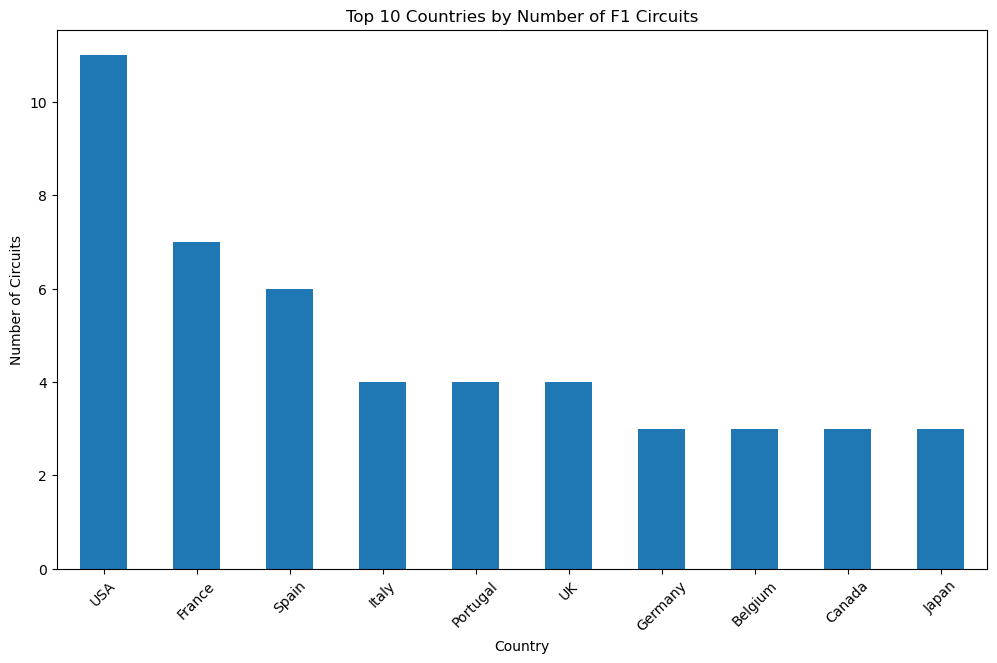

In [15]:
ax1 = country_counts.plot(kind='bar',
                          figsize=(12, 7),
                          title='Top 10 Countries by Number of F1 Circuits',
                          xlabel='Country',
                          ylabel='Number of Circuits',
                          rot=45) # rot is for rotation
ax1.get_figure().savefig('country_counts_chart.png', bbox_inches='tight')

# --- Step 3: Altitude Analysis - Finding the Extremes ---


# First, handle potential missing values in the 'alt' column
# We will fill any missing altitude with 0 for this analysis

In [17]:
df['alt'].fillna(0, inplace=True)

C:\Users\Sakshi\AppData\Local\Temp\ipykernel_7892\3071636510.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['alt'].fillna(0, inplace=True)


# Find the 5 highest altitude circuits

In [18]:
highest_circuits = df.sort_values(by='alt', ascending=False).head(5)
print("--- 5 Highest Altitude F1 Circuits ---")
# Displaying specific columns for clarity
print(highest_circuits[['name', 'country', 'alt']])
print("\n" + "="*40 + "\n")

--- 5 Highest Altitude F1 Circuits ---
                                     name       country   alt
31           Autódromo Hermanos Rodríguez        Mexico  2227
29                                Kyalami  South Africa  1460
35  Autódromo Internacional Nelson Piquet        Brazil  1126
50                        Charade Circuit        France   790
17             Autódromo José Carlos Pace        Brazil   785




# Find the 5 lowest altitude circuits

In [19]:
lowest_circuits = df.sort_values(by='alt', ascending=True).head(5)
print("--- 5 Lowest Altitude F1 Circuits ---")
print(lowest_circuits[['name', 'country', 'alt']])
print("\n" + "="*40 + "\n")

--- 5 Lowest Altitude F1 Circuits ---
                             name     country  alt
71              Baku City Circuit  Azerbaijan   -7
34   Korean International Circuit       Korea    0
76  Miami International Autodrome         USA    0
70                 Sochi Autodrom      Russia    2
23             Yas Marina Circuit         UAE    3




# --- Step 4: Deeper Insights - Average Altitude by Country ---


# Group the data by country and calculate the average altitude

In [20]:
avg_altitude_by_country = df.groupby('country')['alt'].mean().sort_values(ascending=False).head(10)

print("--- Top 10 Countries by Average Circuit Altitude (in meters) ---")
print(avg_altitude_by_country.round(2)) # Rounding to 2 decimal places
print("\n" + "="*40 + "\n")

--- Top 10 Countries by Average Circuit Altitude (in meters) ---
country
Mexico           2227.00
Brazil            955.50
South Africa      737.50
Austria           677.00
United States     642.00
Switzerland       551.00
France            310.00
Japan             298.00
Hungary           264.00
Germany           244.67
Name: alt, dtype: float64




# Create another bar chart using the .plot() method

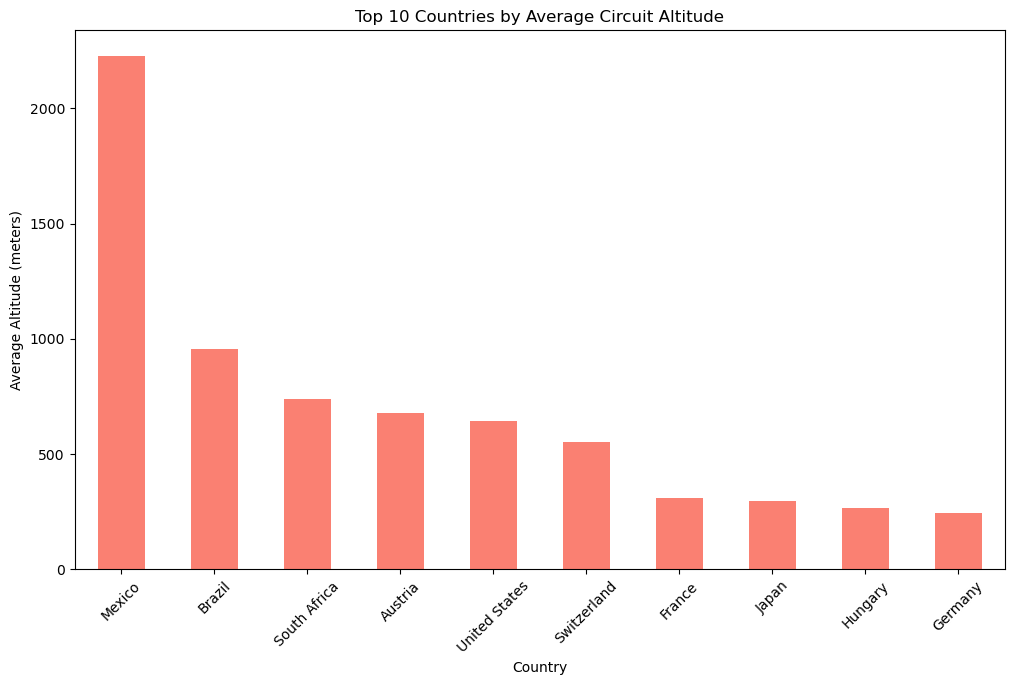

In [21]:
ax2 = avg_altitude_by_country.plot(kind='bar',
                                   figsize=(12, 7),
                                   title='Top 10 Countries by Average Circuit Altitude',
                                   xlabel='Country',
                                   ylabel='Average Altitude (meters)',
                                   color='salmon', # Adding a different color
                                   rot=45)
ax2.get_figure().savefig('avg_altitude_chart.png', bbox_inches='tight')